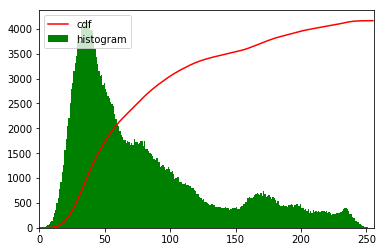

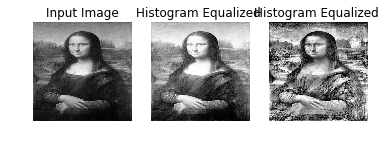

In [11]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 
%matplotlib inline 

def _plot_gray(input_image, output_image1, output_image2):     
    """     
    Converts an image from BGR to RGB and plots     
    """   
    # change color channels order for matplotlib     
    fig, ax = plt.subplots(nrows=1, ncols=3)

    ax[0].imshow(input_image, cmap='gray')          
    ax[0].set_title('Input Image')
    ax[0].axis('off')
    
    ax[1].imshow(output_image1, cmap='gray')          
    ax[1].set_title('Histogram Equalized ')
    ax[1].axis('off')    

    ax[2].imshow(output_image2, cmap='gray')          
    ax[2].set_title('Histogram Equalized ')
    ax[2].axis('off')
    
    plt.savefig('pics/monalisa_histogram_equalized.png')

    plt.show()

def plot_hist_cdf(cdf_normalized, img):
    plt.plot(cdf_normalized, color = 'r')
    plt.hist(img.flatten(),256,[0,256], color = 'g')
    plt.xlim([0,256])
    plt.legend(('cdf','histogram'), loc = 'upper left')
    plt.show()
    

    
def main():
    # read an image 
    img = cv2.imread('pics/monalisa.jpg')
    img = cv2.resize(img, (600,600))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    
    hist,bins = np.histogram(img[100:400, 100:400].flatten(),256,[0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max()/ cdf.max()
    
    # plot hist normalized 
    plot_hist_cdf(cdf_normalized, img[100:400, 100:400])
        
    equ = cv2.equalizeHist(gray)
    
    # create a CLAHE object (Arguments are optional).
    clahe = cv2.createCLAHE()
    cl1 = clahe.apply(gray)
    
    _plot_gray(gray, equ, cl1)
    
if __name__ == '__main__':
    main()